#Mounting drive for dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/dataset


In [3]:
ls

submission.csv  test.csv  train.csv


#Importing necessary libraries

In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold

#loading data........

In [5]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Loaded dataset")

Loaded dataset


In [6]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


**Data Insight**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [8]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


The given table provides statistics for a dataset related to trip details. Let's break down the columns and explain them in simpler terms:

* trip_duration: This column represents the duration of each trip in seconds. The mean (average) trip duration is approximately 1173 seconds.

* distance_traveled: This column represents the distance traveled in each trip. The mean distance traveled is approximately 5.05 units, which could be miles or kilometers depending on the context.

* num_of_passengers: This column represents the number of passengers in each trip. On average, there were approximately 1.29 passengers per trip.

* fare: This column represents the base fare charged for each trip. The mean fare is approximately INR 99.62.

* tip: This column represents the amount of tip given by passengers. On average, passengers gave approximately INR 13.03 as a tip.

* miscellaneous_fees: This column represents any additional fees or charges incurred during the trip. The mean amount of miscellaneous fees is approximately INR 15.14.

* total_fare: This column represents the total fare amount including the base fare, tip, and miscellaneous fees. The mean total fare is approximately INR 127.79.

* surge_applied: This column represents whether a surge pricing was applied to the fare. A value of 1 indicates a surge was applied, and 0 indicates no surge. On average, surge pricing was applied in approximately 28% of the trips.

The standard deviation (std) provides a measure of the variability or spread of the data. For example, the standard deviation of trip duration is approximately 4775 seconds, indicating that the trip durations vary widely in the dataset.

The min and max values represent the minimum and maximum values observed in each column, giving an idea of the range of values in the dataset.

The quartiles (25%, 50%, 75%) provide information about the distribution of the data. For example, the 50th percentile (or median) of trip duration is approximately 707 seconds, indicating that half of the trips have a duration less than or equal to this value.









In [9]:
df.shape

(209673, 8)

# **Data Imbalance Depicted Through Visualization**


#Trip Duration Graphs

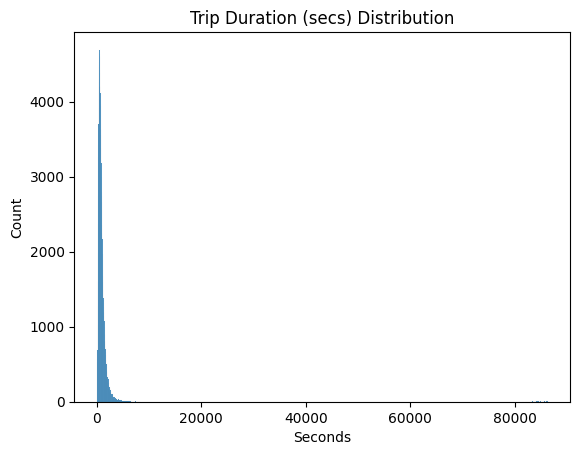

In [10]:

sns.histplot(df['trip_duration'])
plt.title('Trip Duration (secs) Distribution')
plt.xlabel('Seconds')
plt.ylabel('Count')
plt.show()



In [11]:
#trip duration summary
df['trip_duration'].describe()

count    209673.000000
mean       1173.181478
std        4775.653621
min           0.000000
25%         446.000000
50%         707.000000
75%        1098.000000
max       86387.000000
Name: trip_duration, dtype: float64

1. The shortest trip duration in the dataset is 0 seconds. This could indicate trips with no duration or errors in the data.
2. On average, a trip lasts approximately 1,173 seconds. This gives you an idea of the typical duration of a trip in the dataset.
3. This means that half of the trips have a duration less than or equal to 707 seconds.
4. The trip durations vary quite a bit. The standard deviation is a measure of this variability, and in this case, it is approximately 4,776 seconds. So, some trips are much shorter or longer than the average.
5. The longest trip duration in the dataset is 86,387 seconds. This indicates the presence of some very long trips.

#Distance Travelled Graph

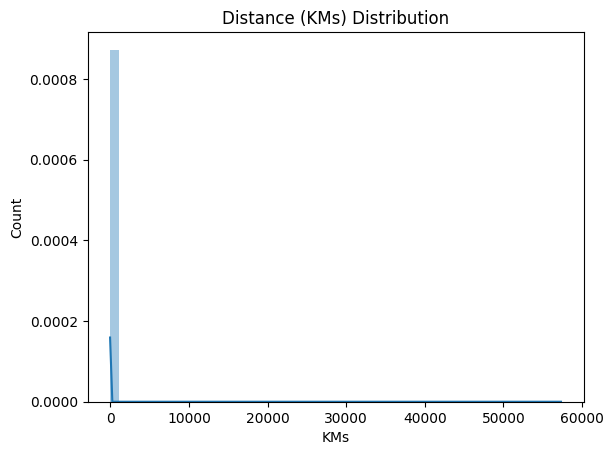

In [12]:
sns.distplot(df['distance_traveled'])
plt.title('Distance (KMs) Distribution')
plt.xlabel('KMs')
plt.ylabel('Count')
plt.show()

In [13]:
#trip duration summary
df['distance_traveled'].describe()

count    209673.000000
mean          5.054431
std         125.217419
min           0.020000
25%           1.950000
50%           3.200000
75%           5.730000
max       57283.910000
Name: distance_traveled, dtype: float64

1. On average, the distance traveled is approximately 5.05 km. This gives you an idea of the typical distance covered in the dataset.
2. The standard deviation is a measure of this variability, and in this case, it is approximately 125.22 km. So, some distances are much shorter or longer than the average.
3. The median or the middle value of the distances traveled is 3.20 km. This means that half of the distances are less than or equal to 3.20 km.
4. The longest distance traveled in the dataset is 57,283.91 km. This indicates the presence of some very long trips.

# Number of Passengers Graph

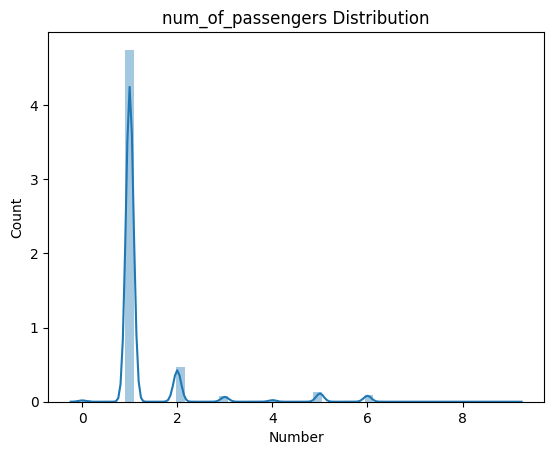

In [14]:
# distplot : It helps to visualize the shape, central tendency, spread, and skewness of the data
sns.distplot(df['num_of_passengers'])
plt.title('num_of_passengers Distribution')
plt.xlabel('Number')
plt.ylabel('Count')
plt.show()

In [15]:
df['num_of_passengers'].value_counts(dropna=False).sort_index()

0.0       753
1.0    179229
2.0     17896
3.0      2757
4.0       908
5.0      4713
6.0      3382
7.0         2
8.0        25
9.0         8
Name: num_of_passengers, dtype: int64

# Surge Graph

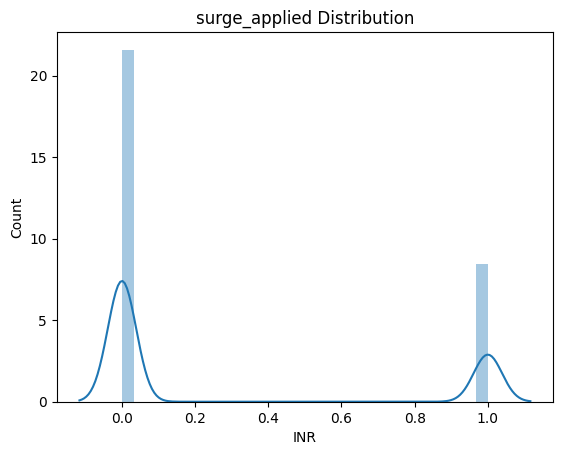

In [16]:
sns.distplot(df['surge_applied'])
plt.title('surge_applied Distribution')
plt.xlabel('INR')
plt.ylabel('Count')
plt.show()

In [17]:
df['surge_applied'].describe()

count    209673.000000
mean          0.280523
std           0.449256
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: surge_applied, dtype: float64

* On average, the surge is applied with a value of approximately 0.28. This indicates that, on average, the surge is applied for about 28% of the data points.
* The minimum value of surge_applied is 0. This means that there are instances where the surge is not applied at all.
* The median or the middle value of surge_applied is also 0. This means that half of the data points have no surge applied.

1. Zero passenger category has a frequency count of 753. It means that there were 753 instances where no passengers were present.
2. Number of passengers can't be zero, there is some corrupted data, might replace all the 0 passengers with base minimum 1, to justify to the model


In [18]:
df['surge_applied'].value_counts(dropna=False).sort_index()

0    150855
1     58818
Name: surge_applied, dtype: int64

In [19]:
df['surge_applied'].value_counts(dropna=False).sort_index()*100/df.shape[0]

0    71.947747
1    28.052253
Name: surge_applied, dtype: float64

#Trip Fare Graph

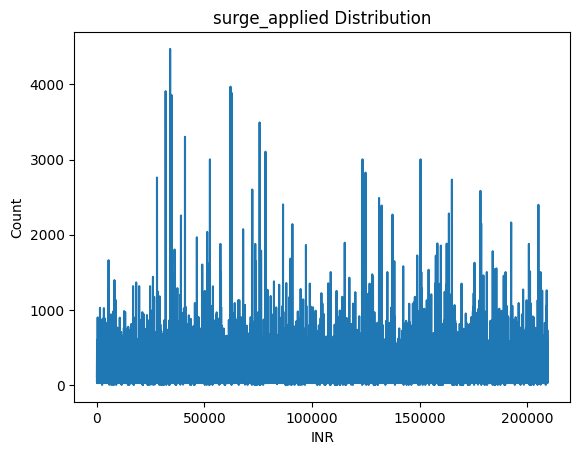

In [20]:
plt.plot(df['total_fare'])
plt.title('surge_applied Distribution')
plt.xlabel('INR')
plt.ylabel('Count')
plt.show()

In [21]:
df['total_fare'].describe()

count    209673.000000
mean        127.791084
std          98.797374
min           0.000000
25%          70.200000
50%         101.700000
75%         152.250000
max        4472.250000
Name: total_fare, dtype: float64

* The average value of 'total_fare' is approximately 127.79. This gives us an idea of the typical fare amount across all observations.

# **Feature Corelations**

**Remove missing data**

Always check to see if there is missing data. As this dataset is huge, removing datapoints with missing data probably has no effect on the models beings trained

In [22]:
#checking nulll values in dataset
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [23]:
#checking when surge is 1 how much fare is calucated for passenger
df[df['surge_applied'] == 1]['total_fare']


2          97.875
5          71.625
7         178.575
10        171.450
11         90.450
           ...   
209652    253.500
209653    108.450
209654    300.375
209659    135.375
209669     95.325
Name: total_fare, Length: 58818, dtype: float64

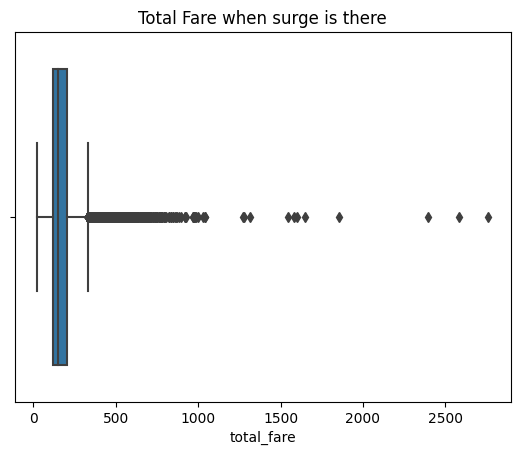

In [24]:
# Surge and Pricing graph
sns.boxplot(x=df[df['surge_applied'] == 1]['total_fare'].reset_index(drop=True))
plt.title('Total Fare when surge is there')
plt.show()

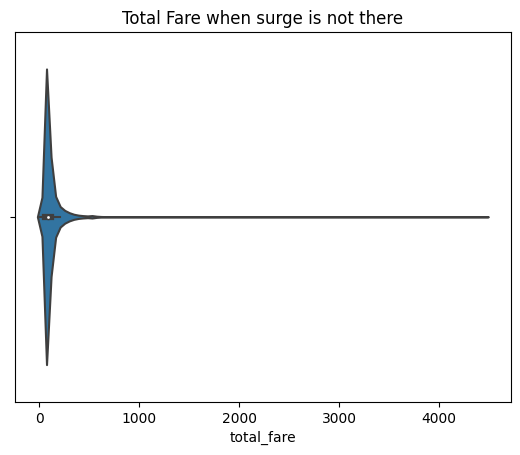

In [25]:
# Surge and Pricing graph
sns.violinplot(x=df[df['surge_applied'] != 1]['total_fare'].reset_index(drop=True))
plt.title('Total Fare when surge is not there')
plt.show()

In [26]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

<Axes: >

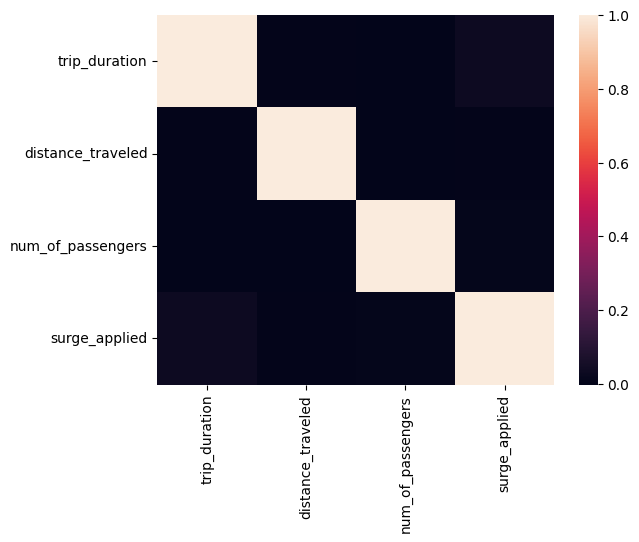

In [27]:
#Checking the correlation among features
sns.heatmap(df[['trip_duration', 'distance_traveled', 'num_of_passengers','surge_applied']].corr())

As expected logically and numerically also, there is no correlation among features. Looks good for modelling

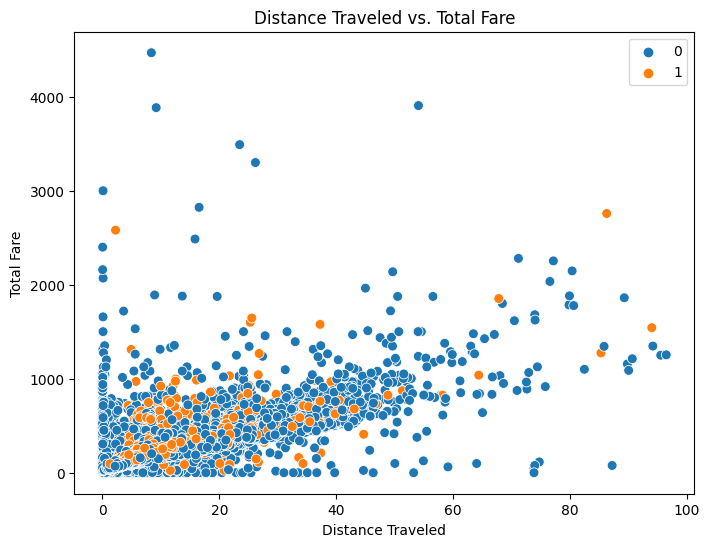

In [28]:
# Filter the data for distances less than 100
filtered_data = df[df['distance_traveled'] < 100]

# Create the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data['distance_traveled'], y=filtered_data['total_fare'], hue=filtered_data['surge_applied'], marker='o', s=50)

# Add labels and title
plt.xlabel('Distance Traveled')
plt.ylabel('Total Fare')
plt.title('Distance Traveled vs. Total Fare')

# Add legend
plt.legend()

# Show the plot
plt.show()

1. From data it looks hard to say surge increased the fare, mostly because the data is imbalanced

Seems to be datatype or precision error, otherwise the calculation seems legit

# **Outliers check**

In [29]:
# Edge cases where trip duration is zero but distance travel is there (outliers)

edge_case_distance_travelled = df[df['trip_duration'] == 0]['distance_traveled']
print("-------------------before outlier removal------------")
print(edge_case_distance_travelled)
print("edge_case distance ", len(edge_case_distance_travelled))

# by seeing these edge cases we can move them to 0 value, for data balancing
print("-------------------after outlier removal------------")
df.loc[df['trip_duration'] == 0, 'distance_traveled'] = 0
df[df['trip_duration'] == 0]['distance_traveled']

-------------------before outlier removal------------
1762      0.02
3074      0.18
4108      0.16
4535      0.02
12418     0.06
15019     7.19
36462     0.06
46617     0.11
51024     0.05
51257     0.43
57763     0.13
65008     0.23
69620     0.18
75746     0.10
80323     0.02
82499     0.24
85904     0.21
98332     0.02
130369    0.10
131446    0.16
139456    0.11
140179    0.18
144462    0.40
154787    3.22
174252    0.11
181260    0.11
181484    0.05
189435    0.06
189685    0.29
190278    0.37
201019    0.11
203692    0.23
208249    0.05
Name: distance_traveled, dtype: float64
edge_case distance  33
-------------------after outlier removal------------


1762      0.0
3074      0.0
4108      0.0
4535      0.0
12418     0.0
15019     0.0
36462     0.0
46617     0.0
51024     0.0
51257     0.0
57763     0.0
65008     0.0
69620     0.0
75746     0.0
80323     0.0
82499     0.0
85904     0.0
98332     0.0
130369    0.0
131446    0.0
139456    0.0
140179    0.0
144462    0.0
154787    0.0
174252    0.0
181260    0.0
181484    0.0
189435    0.0
189685    0.0
190278    0.0
201019    0.0
203692    0.0
208249    0.0
Name: distance_traveled, dtype: float64

In [30]:
#taking features that make total fare
df[['fare','tip', 'miscellaneous_fees', 'total_fare']]

,fare,tip,miscellaneous_fees,total_fare
0,75.00,24,6.300,105.300
1,105.00,24,13.200,142.200
2,71.25,0,26.625,97.875
3,90.00,0,9.750,99.750
4,45.00,12,13.200,70.200
...,...,...,...,...
209668,150.00,47,5.800,202.800
209669,48.75,12,34.575,95.325
209670,63.75,0,6.000,69.750
209671,56.25,0,13.500,69.750


In [31]:
# Checking total fare calculation seems fare or not
df['final_fare_calculated_as_sum_of_components'] = df[['fare','tip', 'miscellaneous_fees']].sum(axis=1)
df[['final_fare_calculated_as_sum_of_components','total_fare']]

,final_fare_calculated_as_sum_of_components,total_fare
0,105.300,105.300
1,142.200,142.200
2,97.875,97.875
3,99.750,99.750
4,70.200,70.200
...,...,...
209668,202.800,202.800
209669,95.325,95.325
209670,69.750,69.750
209671,69.750,69.750


In [32]:
df[['final_fare_calculated_as_sum_of_components','total_fare']].dtypes

final_fare_calculated_as_sum_of_components    float64
total_fare                                    float64
dtype: object

In [33]:
df[df['final_fare_calculated_as_sum_of_components'] != df['total_fare']][['final_fare_calculated_as_sum_of_components','total_fare']]

,final_fare_calculated_as_sum_of_components,total_fare
160437,63.375,63.375


Seems like total fare is correct after calculating fare from features, and in above case looks like it is because of

**Removing Outliers**

In [34]:
def remove_outliers(series):
    # Calculate the first quartile (Q1), third quartile (Q3), and IQR
    q1 = np.percentile(series, 25)
    q3 = np.percentile(series, 75)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove outliers from the series
#     cleaned_series = [x for x in series if lower_bound <= x <= upper_bound]

    return lower_bound, upper_bound

In [35]:
#make list of outliers which are not in bounds of trip_duration feature
df['trip_duration_lb'], df['trip_duration_ub'] = remove_outliers(df['trip_duration'])
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,final_fare_calculated_as_sum_of_components,trip_duration_lb,trip_duration_ub
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0,105.300,-532.0,2076.0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0,142.200,-532.0,2076.0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1,97.875,-532.0,2076.0
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0,99.750,-532.0,2076.0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0,70.200,-532.0,2076.0
...,...,...,...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0,202.800,-532.0,2076.0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1,95.325,-532.0,2076.0
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0,69.750,-532.0,2076.0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0,69.750,-532.0,2076.0


In [36]:
#make list of outliers which are not in bounds of distance_traveled feature
df['distance_traveled_lb'], df['distance_traveled_ub'] = remove_outliers(df['distance_traveled'])
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,final_fare_calculated_as_sum_of_components,trip_duration_lb,trip_duration_ub,distance_traveled_lb,distance_traveled_ub
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0,105.300,-532.0,2076.0,-3.72,11.4
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0,142.200,-532.0,2076.0,-3.72,11.4
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1,97.875,-532.0,2076.0,-3.72,11.4
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0,99.750,-532.0,2076.0,-3.72,11.4
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0,70.200,-532.0,2076.0,-3.72,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0,202.800,-532.0,2076.0,-3.72,11.4
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1,95.325,-532.0,2076.0,-3.72,11.4
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0,69.750,-532.0,2076.0,-3.72,11.4
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0,69.750,-532.0,2076.0,-3.72,11.4


In [37]:
#removing outliers which are not in bounds of distance_traveled and trip_duration feature
df = df.loc[(df['trip_duration'] <= df['trip_duration_ub']) & (df['distance_traveled'] <= df['distance_traveled_ub'])]
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,final_fare_calculated_as_sum_of_components,trip_duration_lb,trip_duration_ub,distance_traveled_lb,distance_traveled_ub
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0,105.300,-532.0,2076.0,-3.72,11.4
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0,142.200,-532.0,2076.0,-3.72,11.4
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1,97.875,-532.0,2076.0,-3.72,11.4
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0,99.750,-532.0,2076.0,-3.72,11.4
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0,70.200,-532.0,2076.0,-3.72,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209667,354.0,1.24,1.0,45.00,0,6.000,51.000,0,51.000,-532.0,2076.0,-3.72,11.4
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0,202.800,-532.0,2076.0,-3.72,11.4
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1,95.325,-532.0,2076.0,-3.72,11.4
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0,69.750,-532.0,2076.0,-3.72,11.4


**Reduction of 11% of data in outliers, hopefully shall improve model performance**

# **Modelling**

In [38]:
#Ready Dataset for training after removing outliers and data cleaning
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,final_fare_calculated_as_sum_of_components,trip_duration_lb,trip_duration_ub,distance_traveled_lb,distance_traveled_ub
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0,105.300,-532.0,2076.0,-3.72,11.4
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0,142.200,-532.0,2076.0,-3.72,11.4
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1,97.875,-532.0,2076.0,-3.72,11.4
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0,99.750,-532.0,2076.0,-3.72,11.4
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0,70.200,-532.0,2076.0,-3.72,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209667,354.0,1.24,1.0,45.00,0,6.000,51.000,0,51.000,-532.0,2076.0,-3.72,11.4
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0,202.800,-532.0,2076.0,-3.72,11.4
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1,95.325,-532.0,2076.0,-3.72,11.4
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0,69.750,-532.0,2076.0,-3.72,11.4


In [39]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied',
       'final_fare_calculated_as_sum_of_components', 'trip_duration_lb',
       'trip_duration_ub', 'distance_traveled_lb', 'distance_traveled_ub'],
      dtype='object')

In [40]:
#taking needed feature for respective X and y
model_features = ['trip_duration', 'distance_traveled', 'num_of_passengers','surge_applied']
X = df[model_features]
y = df['total_fare']

#Splitting dataset for training for two cases
#Case 1
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=101)

#Case 2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,train_size=0.1, random_state=101)

In [41]:
#Case 1 train dataset
X_train

,trip_duration,distance_traveled,num_of_passengers,surge_applied
199502,457.0,1.93,1.0,0
38294,324.0,1.40,2.0,0
37836,614.0,2.16,1.0,0
155896,195.0,1.66,1.0,0
73149,682.0,2.66,1.0,0
...,...,...,...,...
169101,1316.0,6.53,1.0,0
61658,668.0,2.22,1.0,0
55520,1795.0,7.81,1.0,1
152605,834.0,2.22,1.0,0


In [42]:
#Case 2 train dataset
X_train_2

,trip_duration,distance_traveled,num_of_passengers,surge_applied
47783,690.0,2.64,1.0,0
159530,392.0,1.45,1.0,1
160502,481.0,3.54,1.0,1
172342,343.0,1.13,1.0,0
60789,225.0,1.54,1.0,0
...,...,...,...,...
169101,1316.0,6.53,1.0,0
61658,668.0,2.22,1.0,0
55520,1795.0,7.81,1.0,1
152605,834.0,2.22,1.0,0


# Feature transformation technique : Standarization of data using MinMaxScaler

In [43]:
#Initializing scaler object
scaler = MinMaxScaler()

#function to generate standarize data for respective Xtrain
def correct_standarization(X_train):

  # Fitting on only X_train
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)

  return X_train


In [44]:
#Initializing linear regression model for both cases
model1 = LinearRegression()
model2 = LinearRegression()

In [45]:
# function cross validation and fitting model
def cross_validation_score_train(kf_split, model, X_train, y_train, print_case):
  kf = KFold(n_splits=kf_split, shuffle=True, random_state=101)
  scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
  print('Cross-Validation Scores: ', print_case," :", scores)
  model.fit(X_train, y_train)
  return model


#Case 1 modeling
kf_split = 5
X_train = correct_standarization(X_train)
print_case = "Case1"
model1 = cross_validation_score_train(kf_split, model1, X_train, y_train, print_case)
X_test = scaler.transform(X_test)
y_pred = model1.predict(X_test)



#Case 2 modeling
kf_split = 5
X_train_2 = correct_standarization(X_train_2)
print_case = "Case2"
model2 = cross_validation_score_train(kf_split, model2, X_train_2, y_train_2, print_case)
X_test_2 = scaler.transform(X_test_2)
y_pred_2 = model2.predict(X_test_2)




Cross-Validation Scores:  Case1  : [0.55604687 0.5651649  0.57167863 0.55235511 0.53365979]
Cross-Validation Scores:  Case2  : [0.56411538 0.59686153 0.62842013 0.67114828 0.60535277]


In [46]:
# comparing results total fare vs predicted fare CASE 1
comparing_train_df_pred = pd.DataFrame(y_test)
comparing_train_df_pred['Predicted Fare'] = y_pred
comparing_train_df_pred

,total_fare,Predicted Fare
143930,81.000,86.713561
68343,83.700,81.740809
88379,90.000,89.329207
179994,124.125,150.633526
85306,112.950,107.269665
...,...,...
138749,32.250,42.985840
56161,77.850,78.985128
123063,166.950,150.431057
209471,28.500,38.684150


In [47]:
# comparing results total fare vs predicted fare CASE 2
comparing_train_df_pred_2 = pd.DataFrame(y_test_2)
comparing_train_df_pred_2['Predicted Fare'] = y_pred_2
comparing_train_df_pred_2

,total_fare,Predicted Fare
143930,81.000,86.779638
68343,83.700,81.629503
88379,90.000,89.677109
179994,124.125,150.567606
85306,112.950,106.832059
...,...,...
162669,47.250,57.571444
27426,73.500,87.806849
132514,114.750,130.976411
22044,51.000,63.284299


In [48]:
#Evaluation metrics
metrics_case_1 = {
    "Mean absolute error": round(np.sqrt(mean_absolute_error(y_test, y_pred)), 2),
    "Mean squared error": round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
    "Median absolute error": round(np.sqrt(median_absolute_error(y_test, y_pred)), 2),
    "Explain variance score": round(explained_variance_score(y_test, y_pred), 2),
    "R2 score": round(r2_score(y_test, y_pred), 2)
}

metrics_case_2 = {
    "Mean absolute error": round(np.sqrt(mean_absolute_error(y_test_2, y_pred_2)), 2),
    "Mean squared error": round(np.sqrt(mean_squared_error(y_test_2, y_pred_2)), 2),
    "Median absolute error": round(np.sqrt(median_absolute_error(y_test_2, y_pred_2)), 2),
    "Explain variance score": round(explained_variance_score(y_test_2, y_pred_2), 2),
    "R2 score": round(r2_score(y_test_2, y_pred_2), 2)
}

out_df = pd.DataFrame([metrics_case_1, metrics_case_2], index=["CASE 1", "CASE 2"])
print("Evaluation metrics ")
display(out_df)


Evaluation metrics 


,Mean absolute error,Mean squared error,Median absolute error,Explain variance score,R2 score
CASE 1,3.71,34.62,3.18,0.62,0.62
CASE 2,3.74,38.58,3.19,0.56,0.56


#Evaluation on Test.csv of Dataset

In [49]:
# data loading for test.csv
test_data = test_df[['trip_duration', 'distance_traveled', 'num_of_passengers','surge_applied']]
test_data_transform = scaler.transform(test_data)

In [50]:
#Case 1
test_pred = model1.predict(test_data_transform)
test_pred

array([119.39704648,  67.42658022, 111.17740807, ..., 100.76090481,
       138.31655355,  89.34688115])

In [51]:
#showing results of CASE 1 total fare for test.csv
comparing_test_df = pd.DataFrame(test_data)
comparing_test_df['Predicted Fare'] = test_pred
comparing_test_df

,trip_duration,distance_traveled,num_of_passengers,surge_applied,Predicted Fare
0,1076.0,4.18,1.0,0,119.397046
1,429.0,1.48,4.0,0,67.426580
2,856.0,4.15,1.0,0,111.177408
3,622.0,3.22,1.0,0,92.527823
4,507.0,3.98,1.0,0,96.787773
...,...,...,...,...,...
89856,435.0,2.24,1.0,0,75.012001
89857,519.0,2.61,1.0,0,82.105538
89858,450.0,2.24,1.0,1,100.760905
89859,919.0,4.12,1.0,1,138.316554


In [52]:
#Case 2
test_pred_2 = model2.predict(test_data_transform)
test_pred_2

array([118.99227297,  68.19754577, 111.06097926, ..., 100.37735352,
       137.65404116,  89.66836758])

In [53]:
#showing results of CASE 2 total fare for test.csv
comparing_test_df_2 = pd.DataFrame(test_data)
comparing_test_df_2['Predicted Fare'] = test_pred_2
comparing_test_df_2

,trip_duration,distance_traveled,num_of_passengers,surge_applied,Predicted Fare
0,1076.0,4.18,1.0,0,118.992273
1,429.0,1.48,4.0,0,68.197546
2,856.0,4.15,1.0,0,111.060979
3,622.0,3.22,1.0,0,92.552056
4,507.0,3.98,1.0,0,97.106133
...,...,...,...,...,...
89856,435.0,2.24,1.0,0,75.104865
89857,519.0,2.61,1.0,0,82.154592
89858,450.0,2.24,1.0,1,100.377354
89859,919.0,4.12,1.0,1,137.654041


#Conclusion
Linear regression, as anticipated, performs the least efficiently on the training data. This is due to its inherent simplicity, which restricts its ability to identify complex patterns within the data.


The outcome on test data presents a reversal of fortunes with linear regression significantly outperforming the other models.
This test data performance is crucial as it mirrors real-world application of the model.
For complex models, encountering even a single data point featuring an unobserved pattern or attribute can cause them to break down inexplicably. However, due to its simplicity, linear regression can often continue to function reliably in such scenarios.
